# Absorber Examples

**Scott Prahl**

**Oct 2023**

We use Green's function solutions for heat transfer due to an uniform illumination of a
semi-infinte medium, encapsulated within the `Absorber` class. The solutions are
based on the mathematical formulations provided in Carslaw and Jaeger's work.

The `Absorber` class represents an exponentially attenuating heat source that is proportional
to mu_a * exp(-mu_a z). The surface is defined by z=0. The class provides methods to calculate
the temperature rise at any depth `z` and at a specified time `t`, due to different types
surface illumination

Three types of line source behaviors are supported:

- `instantaneous()`: Represents an instantaneous radiant exposure at time `tp`.

- `continuous()`: Represents an irradiance starting at `t=0`.

- `pulsed()`: Represents a radiant exposure lasting from `t=0` to `t_pulse`.

Each of these line sources can be analyzed under different boundary conditions at `z=0`:

- `'infinite'`: No boundary (infinite medium).

- `'adiabatic'`: No heat flow across the boundary.

- `'zero'`: Boundary is fixed at `T=0`.

In [1]:
import grheat
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import erf, erfc, erfcx
joules_per_calorie = 4.184

## Instantaneous heating 

### Infinite medium, exponential heating z>0 at t=0

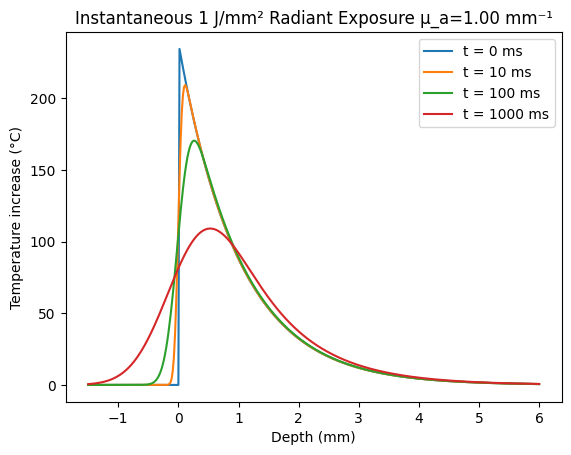

In [2]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a)
z = np.linspace(-0.0015,0.006,401)

T = medium.instantaneous(z,0) * 1e6
plt.plot(z*1000, T, label='t = 0 ms')

T = medium.instantaneous(z,0.01) * 1e6
plt.plot(z*1000, T, label='t = 10 ms')

T = medium.instantaneous(z,0.1) * 1e6
plt.plot(z*1000, T, label='t = 100 ms')

T = medium.instantaneous(z,1) * 1e6
plt.plot(z*1000, T, label='t = 1000 ms')

plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1 J/mm² Radiant Exposure µ_a=%.2f mm⁻¹" % (mu_a/1000))
plt.legend()
plt.show()

#### Checking total deposited energy

In [3]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a)
z = np.linspace(-0.0015,0.006,401)
dz = z[1]-z[0]

print('No surface boundary condition, instantaneous pulse')
print('time   total')
t = 0
T = medium.instantaneous(z,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 0.01
T = medium.instantaneous(z,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 0.1
T = medium.instantaneous(z,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 1
T = medium.instantaneous(z,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

No surface boundary condition, instantaneous pulse
time   total
0.0000 0.9882
0.0100 0.9975
0.1000 0.9975
1.0000 0.9968


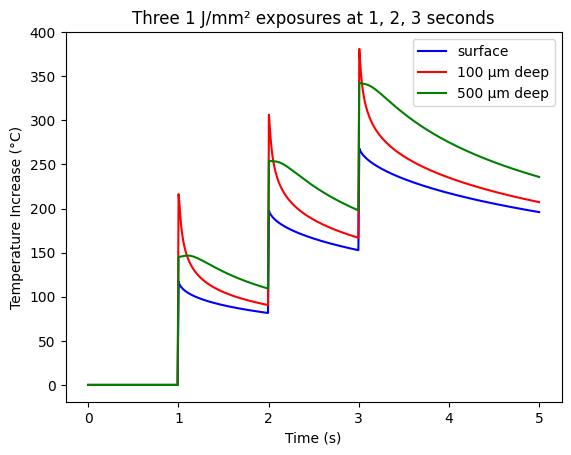

In [20]:
mua = 1 * 1000               # 1/m  (1mm⁻¹ = 1000m⁻¹)
tp = np.array([1,2,3], dtype=float)

medium = grheat.Absorber(mua, tp=tp)

t = np.linspace(0, 5, 500)   # seconds

z = 0                        # meters
T = medium.instantaneous(z, t) * 1e6  # 1 J/mm^2
plt.plot(t, T, color='blue', label="surface")

z = 0.0001
T = medium.instantaneous(z, t) * 1e6  # 1 J/mm^2
plt.plot(t, T, color='red', label="100 µm deep")

z = 0.0005
T = medium.instantaneous(z, t) * 1e6  # 1 J/mm^2
plt.plot(t, T, color='green', label="500 µm deep")

plt.xlabel("Time (s)")
plt.ylabel("Temperature Increase (°C)")
plt.title("Three 1 J/mm² exposures at 1, 2, 3 seconds")
plt.legend()
plt.show()

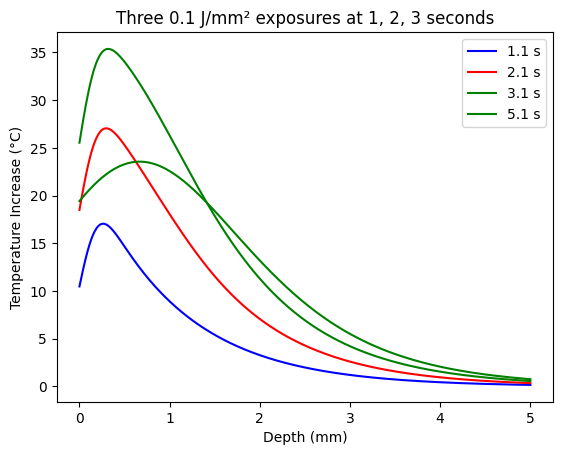

In [25]:
mua = 1 * 1000               # 1/m  (1mm⁻¹ = 1000m⁻¹)
tp = np.array([1,2,3], dtype=float)

medium = grheat.Absorber(mua, tp=tp)

z = np.linspace(0, 0.005, 500)   # m

t = 1.1                       # s
T = medium.instantaneous(z, t) * 1e5  # 1 J/mm^2
plt.plot(z*1000, T, color='blue', label="1.1 s")

t = 2.1                       # s
T = medium.instantaneous(z, t) * 1e5  # 1 J/mm^2
plt.plot(z*1000, T, color='red', label="2.1 s")

t = 3.1                       # s
T = medium.instantaneous(z, t) * 1e5  # 1 J/mm^2
plt.plot(z*1000, T, color='green', label="3.1 s")

t = 5.1                       # s
T = medium.instantaneous(z, t) * 1e5  # 1 J/mm^2
plt.plot(z*1000, T, color='green', label="5.1 s")

plt.xlabel("Depth (mm)")
plt.ylabel("Temperature Increase (°C)")
plt.title("Three 0.1 J/mm² exposures at 1, 2, 3 seconds")
plt.legend()
plt.show()

### Adiabatic surface condition

In [ ]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a, boundary='adiabatic')
z = np.linspace(-0.003,0.003,601)

t = 0
T = medium.instantaneous(z,0) * 1e6
plt.plot(z*1000, T, label='t = %.1f ms' % (t*1000))

t = 0.1
T = medium.instantaneous(z,t) * 1e6
plt.plot(z*1000, T, label='t = %.1f ms' % (t*1000))

t = 1
T = medium.instantaneous(z,t) * 1e6
plt.plot(z*1000, T, label='t = %.1f ms' % (t*1000))

plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1 J/mm² Adiabatic boundary µ_a=%.2f mm⁻¹" % (mu_a/1000))
plt.axvspan(0,z[-1]*1000,color='cyan',alpha=0.8)
plt.legend()
plt.show()

In [ ]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a, boundary='infinite')

print("No Boundary")
print("     z      t      T")
z, t = 0, 0
print('%.5f %.4f  %.2f' %(z, t, medium.instantaneous(z,t) * 1e6))
z, t = 0, 0.0001
print('%.5f %.4f  %.2f surface immediately drops by 50%%' %(z, t, medium.instantaneous(z,t) * 1e6))
z, t = 0.00001, 0
print('%.5f %.4f  %.2f' %(z, t, medium.instantaneous(z,t) * 1e6))
z, t = 0.00001, 0.0001
print('%.5f %.4f  %.2f internal temp does not change so quickly' %(z, t, medium.instantaneous(z,t) * 1e6))

print("\nAdiabatic Boundary")
print("     z      t      T")
medium = grheat.Absorber(mu_a, boundary='adiabatic')
z, t = 0, 0
print('%.5f %.4f  %.2f' %(z, t, medium.instantaneous(z,t) * 1e6))
z, t = 0, 0.0001
print('%.5f %.4f  %.2f' %(z, t, medium.instantaneous(z,t) * 1e6))
z, t = 0.00001, 0
print('%.5f %.4f  %.2f' %(z, t, medium.instantaneous(z,t) * 1e6))
z, t = 0.00001, 0.0001
print('%.5f %.4f  %.2f' %(z, t, medium.instantaneous(z,t) * 1e6))

print("\nZero Boundary")
print("     z      t      T")
medium = grheat.Absorber(mu_a, boundary='zero')
z, t = 0, 0
print('%.5f %.4f  %.2f' %(z, t, medium.instantaneous(z,t) * 1e6))
z, t = 0, 0.0001
print('%.5f %.4f  %.2f' %(z, t, medium.instantaneous(z,t) * 1e6))
z, t = 0.00001, 0
print('%.5f %.4f  %.2f' %(z, t, medium.instantaneous(z,t) * 1e6))
z, t = 0.00001, 0.0001
print('%.5f %.4f  %.2f' %(z, t, medium.instantaneous(z,t) * 1e6))

In [ ]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a, boundary='adiabatic')
z = np.linspace(0,0.006,401)

T = medium.instantaneous(z,0) * 1e6
plt.plot(z*1000, T, label='t = 0 ms')

T = medium.instantaneous(z,0.01) * 1e6
plt.plot(z*1000, T, label='t = 10 ms')

T = medium.instantaneous(z,0.1) * 1e6
plt.plot(z*1000, T, label='t = 100 ms')

T = medium.instantaneous(z,1) * 1e6
plt.plot(z*1000, T, label='t = 1000 ms')

plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1 J/mm² Radiant Exposure µ_a=%.2f mm⁻¹" % (mu_a/1000))
plt.legend()
plt.show()

In [ ]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a, boundary='adiabatic')
z = np.linspace(0,0.007,401)
dz = z[1]-z[0]

print('Adiabatic surface boundary condition, instantaneous pulse')
print('time   total')
t = 0
T = medium.instantaneous(z,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 0.01
T = medium.instantaneous(z,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 0.1
T = medium.instantaneous(z,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 1
T = medium.instantaneous(z,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

## Continuous heating 

### Infinite medium, but heating z>0

In [ ]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a)

t=0.0
z = np.linspace(-0.0005,0.005)

T = medium.continuous(z,0.001) * 1e6
plt.plot(z*1000, T, label='t = 1 ms')

T = medium.continuous(z,0.01) * 1e6
plt.plot(z*1000, T, label='t = 10 ms')

T = medium.continuous(z,0.1) * 1e6
plt.plot(z*1000, T, label='t = 100 ms')

T = medium.continuous(z,1) * 1e6
plt.plot(z*1000, T, label='t = 1000 ms')

plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Infinite medium (%.2f mm⁻¹) - continuous 1 W/mm²" % (mu_a/1000))
plt.legend()
plt.axvline(0)
plt.show()

In [ ]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a)
z = np.linspace(-0.0015,0.006,401)
dz = z[1]-z[0]

print('No surface boundary condition, instantaneous pulse')
print('time   total')
t = 0
T = medium.continuous(z,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 0.01
T = medium.continuous(z,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 0.1
T = medium.continuous(z,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 1
T = medium.continuous(z,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

### Adiabatic surface condition

In [ ]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a, boundary='adiabatic')

t=0.0
z = np.linspace(0.000,0.005)

T = medium.continuous(z,0.001) * 1e6
plt.plot(z*1000, T, label='t = 1 ms')

T = medium.continuous(z,0.01) * 1e6
plt.plot(z*1000, T, label='t = 10 ms')

T = medium.continuous(z,0.1) * 1e6
plt.plot(z*1000, T, label='t = 100 ms')

T = medium.continuous(z,1) * 1e6
plt.plot(z*1000, T, label='t = 1000 ms')

plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Adiabatic medium (%.2f mm⁻¹) - continuous 1 W/mm²" % (mu_a/1000))
plt.legend()
plt.show()

### Zero surface condition

In [ ]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a, boundary='zero')

t=0.0
z = np.linspace(0.000,0.005,501)

T = medium.continuous(z,0.001) * 1e6
plt.plot(z*1000, T, label='t = 1 ms')

T = medium.continuous(z,0.01) * 1e6
plt.plot(z*1000, T, label='t = 10 ms')

T = medium.continuous(z,0.1) * 1e6
plt.plot(z*1000, T, label='t = 100 ms')

T = medium.continuous(z,1) * 1e6
plt.plot(z*1000, T, label='t = 1000 ms')

plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Zero Surface (%.2f mm⁻¹) - continuous 1 W/mm²" % (mu_a/1000))
plt.legend()
plt.show()

## Pulsed heating 

### Infinite medium, but heating z>0

In [ ]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a)

t=0.0
z = np.linspace(-0.0005,0.005, 501)

T = medium.pulsed(z,0.001, 0.001) * 1e6
plt.plot(z*1000, T, label='t = 1 ms')

T = medium.pulsed(z,0.01,0.01) * 1e6
plt.plot(z*1000, T, label='t = 10 ms')

T = medium.pulsed(z,0.1,0.1) * 1e6
plt.plot(z*1000, T, label='t = 100 ms')

T = medium.pulsed(z,1,1) * 1e6
plt.plot(z*1000, T, label='t = 1000 ms')

plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Infinite medium (%.2f mm⁻¹) - continuous 1 W/mm²" % (mu_a/1000))
plt.legend()
plt.axvline(0)
plt.show()

In [ ]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a)
z = np.linspace(-0.0015,0.006,401)
dz = z[1]-z[0]

print('No surface boundary condition, pulsed')
print('time   total')
t = 0.001
T = medium.pulsed(z,t,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 0.01
T = medium.pulsed(z,t,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 0.1
T = medium.pulsed(z,t,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 1
T = medium.pulsed(z,t,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

In [ ]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a)
z = np.linspace(-0.003,0.008,401)
dz = z[1]-z[0]
t_pulse = 0.1

print('No surface boundary condition, pulsed')
print('time   total')
t = 0.5 * t_pulse
T = medium.pulsed(z,t,t_pulse) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = t_pulse
T = medium.pulsed(z,t,t_pulse) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 2 * t_pulse
T = medium.pulsed(z,t,t_pulse) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 10 * t_pulse
T = medium.pulsed(z,t,t_pulse) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

### Adiabatic boundary condition

In [ ]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a, boundary='adiabatic')

t=0.0
z = np.linspace(0,0.005, 501)

T = medium.pulsed(z,0.001, 0.001) * 1e6
plt.plot(z*1000, T, label='t = 1 ms')

T = medium.pulsed(z,0.01,0.01) * 1e6
plt.plot(z*1000, T, label='t = 10 ms')

T = medium.pulsed(z,0.1,0.1) * 1e6
plt.plot(z*1000, T, label='t = 100 ms')

T = medium.pulsed(z,1,1) * 1e6
plt.plot(z*1000, T, label='t = 1000 ms')

plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Adiabatic medium (%.2f mm⁻¹) - pulsed 1 J/mm²" % (mu_a/1000))
plt.legend()
plt.axvline(0)
plt.show()

In [ ]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a, boundary='adiabatic')
z = np.linspace(0,0.006,401)
dz = z[1]-z[0]

print('Adiabatic surface boundary condition, pulsed')
print('time   total')
t = 0.001
T = medium.pulsed(z,t,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 0.01
T = medium.pulsed(z,t,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 0.1
T = medium.pulsed(z,t,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 1
T = medium.pulsed(z,t,t) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

In [ ]:
mu_a = 1 * 1000  # 1/m
medium = grheat.Absorber(mu_a, boundary='adiabatic')
z = np.linspace(0,0.008,401)
dz = z[1]-z[0]
t_pulse = 0.1

print('No surface boundary condition, pulsed')
print('time   total')
t = 0.5 * t_pulse
T = medium.pulsed(z,t,t_pulse) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = t_pulse
T = medium.pulsed(z,t,t_pulse) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 2 * t_pulse
T = medium.pulsed(z,t,t_pulse) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

t = 10 * t_pulse
T = medium.pulsed(z,t,t_pulse) * 1e6
print("%.4f %.4f" % (t, T.sum()*dz*joules_per_calorie))

### Showing zero boundary condition

In [ ]:
point = grheat.Point(0, 0, 0.0001, boundary='constant')
t = 1
tp = 0
z = np.linspace(0,0.003,50)
T = point.instantaneous(0,0,z,t,tp)
plt.plot(z*1000,T, label='at (0,0,0)')
plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1J point sources located a depth of 1mm")
plt.show()

In [ ]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

In [ ]:
xp, yp, zp = 0, 0, 0.0001      # meters

point = grheat.Point(xp, yp, zp, boundary='adiabatic')
t_pulse = 1
t = 1.1
arr = np.linspace(-1,1,100) * 0.001
X, Y = np.meshgrid(arr, arr)
T = point.pulsed(X, Y, 0, t, t_pulse)
plt.pcolormesh(X*1e6, Y*1e6, T)
plt.xlabel("X position on surface (microns)")
plt.ylabel("Y position on surface (microns)")
plt.gca().set_aspect(1)
plt.show()

In [ ]:
tp = 0
t = 1
for t_pulse in [0.0001, 0.001, 0.01, 0.1, 0.99]:
    T1 = point.instantaneous(0,0,0,t,0,0,1e-3,tp)
    T2 = point.pulsed(0,0,0,t,0,0,1e-3,t_pulse)
    print("%.4f  %.4f" %(t_pulse, T2/T1))

In [ ]:
mua = 4 * 1000               # 1/m  (1mm⁻¹ = 1000m⁻¹)
medium = grheat.Absorber(mua)
t = np.linspace(0, 1, 200)   # seconds
t_pulse = 0.200              # seconds

z = 0                        # meters
T = medium.pulsed(z, t, t_pulse)      # 1 J/m^2
T *= 1e4                              # 10 mJ/mm^2

plt.plot(t * 1000, T, color='blue', label="(0,0,%.1f)mm"%(1000*z))

z = 0.0001
T = medium.pulsed(z, t, t_pulse)      # 1 J/m^2
T *= 1e4                              # 10 mJ/mm^2

plt.plot(t * 1000, T, color='red', label="(0,0,%.1f)mm"%(1000*z))

plt.xlabel("Time (ms)")
plt.ylabel("Temperature Increase (°C)")
plt.title("1 J/mm² radiant exposure pulse lasting %.0f ms" % (t_pulse * 1000))
plt.legend()
plt.show()

In [ ]:
point = grheat.Point(0, 0, 0.001)
t = np.linspace(0,3,100)
tp = 0
T = point.instantaneous(0,0,0,t,tp)
plt.plot(t,T, label='at (0,0,0)')
T = point.instantaneous(0,1e-3,0,t,tp)
plt.plot(t,T, label='at (0,1mm,0)')
plt.legend()
plt.xlabel("time (s)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1J point sources located a depth of 1mm")
plt.show()